# Preprocessing

In [ ]:
import pandas as pd

raw_data = pd.read_csv('amazon_reviews.csv')

In [ ]:
raw_data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,5306d3f8-516d-4453-9903-2d6d39fb0a75,Corey Britt,Okay so they told me to create a new account I...,1,0,28.12.0.100,2024-06-16 21:48:38,28.12.0.100
1,055d0ca9-277f-4318-aa32-33ab23781666,Bertha Garcia,👍,5,0,28.12.0.100,2024-06-16 21:44:12,28.12.0.100
2,3f98a5d8-bda3-4d4e-a004-238ccfc1a3df,Valerie Richardson,Always easy to use!,5,0,28.12.0.100,2024-06-16 21:43:43,28.12.0.100
3,7ba3fa36-39cd-4f35-ab23-dc55b3ff0495,Debbie Brotherton,Very good quick delivery,5,0,NaN,2024-06-16 21:32:44,NaN
4,26d63894-e155-4f8e-bd21-4c2cfdbe06f4,Nicholas Soto,I tried buying two items. My card was locked a...,2,0,28.12.0.100,2024-06-16 21:26:36,28.12.0.100


In [ ]:
def get_sentiment(score):
  if score <= 2:
    return 'Bad'
  elif score == 3:
    return 'Neutral'
  else:
    return 'Good'

raw_data['sentiment'] = raw_data['score'].apply(get_sentiment)
raw_data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment
0,5306d3f8-516d-4453-9903-2d6d39fb0a75,Corey Britt,Okay so they told me to create a new account I...,1,0,28.12.0.100,2024-06-16 21:48:38,28.12.0.100,Bad
1,055d0ca9-277f-4318-aa32-33ab23781666,Bertha Garcia,👍,5,0,28.12.0.100,2024-06-16 21:44:12,28.12.0.100,Good
2,3f98a5d8-bda3-4d4e-a004-238ccfc1a3df,Valerie Richardson,Always easy to use!,5,0,28.12.0.100,2024-06-16 21:43:43,28.12.0.100,Good
3,7ba3fa36-39cd-4f35-ab23-dc55b3ff0495,Debbie Brotherton,Very good quick delivery,5,0,NaN,2024-06-16 21:32:44,NaN,Good
4,26d63894-e155-4f8e-bd21-4c2cfdbe06f4,Nicholas Soto,I tried buying two items. My card was locked a...,2,0,28.12.0.100,2024-06-16 21:26:36,28.12.0.100,Bad


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53298 entries, 0 to 53297
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              53298 non-null  object
 1   userName              53293 non-null  object
 2   content               53296 non-null  object
 3   score                 53298 non-null  int64 
 4   thumbsUpCount         53298 non-null  int64 
 5   reviewCreatedVersion  48059 non-null  object
 6   at                    53298 non-null  object
 7   appVersion            48059 non-null  object
 8   sentiment             53298 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.7+ MB


In [ ]:
#removing null values

raw_data = raw_data.dropna(how='any',axis=0)

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48054 entries, 0 to 53297
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              48054 non-null  object
 1   userName              48054 non-null  object
 2   content               48054 non-null  object
 3   score                 48054 non-null  int64 
 4   thumbsUpCount         48054 non-null  int64 
 5   reviewCreatedVersion  48054 non-null  object
 6   at                    48054 non-null  object
 7   appVersion            48054 non-null  object
 8   sentiment             48054 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.7+ MB


In [ ]:
# text preprocessing


# download nltk

import nltk

nltk.download('all')


# create a list text

content_text = list(raw_data['content'])




# preprocessing loop

import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [ ]:
corpus = []


for i in range(len(content_text)):

    r = re.sub('[^a-zA-Z]', ' ', content_text[i])

    r = r.lower()

    r = r.split()

    r = [word for word in r if word not in stopwords.words('english')]

    r = [lemmatizer.lemmatize(word) for word in r]

    r = ' '.join(r)

    corpus.append(r)




#assign corpus to data['text']

raw_data['content'] = corpus

raw_data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment
0,5306d3f8-516d-4453-9903-2d6d39fb0a75,Corey Britt,okay told create new account tried multiple ti...,1,0,28.12.0.100,2024-06-16 21:48:38,28.12.0.100,Bad
1,055d0ca9-277f-4318-aa32-33ab23781666,Bertha Garcia,,5,0,28.12.0.100,2024-06-16 21:44:12,28.12.0.100,Good
2,3f98a5d8-bda3-4d4e-a004-238ccfc1a3df,Valerie Richardson,always easy use,5,0,28.12.0.100,2024-06-16 21:43:43,28.12.0.100,Good
4,26d63894-e155-4f8e-bd21-4c2cfdbe06f4,Nicholas Soto,tried buying two item card locked time unlocke...,2,0,28.12.0.100,2024-06-16 21:26:36,28.12.0.100,Bad
5,fff47ed5-bf78-41af-82f5-a05b2a298901,Mark Burnworth,fast reliable return happen quickly,5,0,28.11.2.100,2024-06-16 20:57:22,28.11.2.100,Good


In [ ]:
raw_data.to_csv(r'/content/amazon_reviews_preprocessed.csv')

In [ ]:
final_data = pd.read_csv('amazon_reviews_preprocessed.csv')

In [ ]:
final_data.head()

,Unnamed: 0,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment
0,0,5306d3f8-516d-4453-9903-2d6d39fb0a75,Corey Britt,okay told create new account tried multiple ti...,1,0,28.12.0.100,2024-06-16 21:48:38,28.12.0.100,Bad
1,1,055d0ca9-277f-4318-aa32-33ab23781666,Bertha Garcia,NaN,5,0,28.12.0.100,2024-06-16 21:44:12,28.12.0.100,Good
2,2,3f98a5d8-bda3-4d4e-a004-238ccfc1a3df,Valerie Richardson,always easy use,5,0,28.12.0.100,2024-06-16 21:43:43,28.12.0.100,Good
3,4,26d63894-e155-4f8e-bd21-4c2cfdbe06f4,Nicholas Soto,tried buying two item card locked time unlocke...,2,0,28.12.0.100,2024-06-16 21:26:36,28.12.0.100,Bad
4,5,fff47ed5-bf78-41af-82f5-a05b2a298901,Mark Burnworth,fast reliable return happen quickly,5,0,28.11.2.100,2024-06-16 20:57:22,28.11.2.100,Good


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48054 entries, 0 to 48053
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            48054 non-null  int64 
 1   reviewId              48054 non-null  object
 2   userName              48054 non-null  object
 3   content               47994 non-null  object
 4   score                 48054 non-null  int64 
 5   thumbsUpCount         48054 non-null  int64 
 6   reviewCreatedVersion  48054 non-null  object
 7   at                    48054 non-null  object
 8   appVersion            48054 non-null  object
 9   sentiment             48054 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.7+ MB


In [ ]:
raw_data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment
0,5306d3f8-516d-4453-9903-2d6d39fb0a75,Corey Britt,okay told create new account tried multiple ti...,1,0,28.12.0.100,2024-06-16 21:48:38,28.12.0.100,Bad
1,055d0ca9-277f-4318-aa32-33ab23781666,Bertha Garcia,,5,0,28.12.0.100,2024-06-16 21:44:12,28.12.0.100,Good
2,3f98a5d8-bda3-4d4e-a004-238ccfc1a3df,Valerie Richardson,always easy use,5,0,28.12.0.100,2024-06-16 21:43:43,28.12.0.100,Good
4,26d63894-e155-4f8e-bd21-4c2cfdbe06f4,Nicholas Soto,tried buying two item card locked time unlocke...,2,0,28.12.0.100,2024-06-16 21:26:36,28.12.0.100,Bad
5,fff47ed5-bf78-41af-82f5-a05b2a298901,Mark Burnworth,fast reliable return happen quickly,5,0,28.11.2.100,2024-06-16 20:57:22,28.11.2.100,Good


In [ ]:
raw_data.to_csv(r'/content/amazon_reviews_preprocessed.csv')

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48054 entries, 0 to 53297
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              48054 non-null  object
 1   userName              48054 non-null  object
 2   content               48054 non-null  object
 3   score                 48054 non-null  int64 
 4   thumbsUpCount         48054 non-null  int64 
 5   reviewCreatedVersion  48054 non-null  object
 6   at                    48054 non-null  object
 7   appVersion            48054 non-null  object
 8   sentiment             48054 non-null  object
dtypes: int64(2), object(7)
memory usage: 4.7+ MB


In [ ]:
final_data = pd.read_csv('amazon_reviews_preprocessed.csv')

In [ ]:
import numpy as np

final_data['sentiment'] = np.where(final_data['score'] <= 3, 'Bad','Good')

In [ ]:
final_data.head(50)


,Unnamed: 0,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment
0,0,5306d3f8-516d-4453-9903-2d6d39fb0a75,Corey Britt,okay told create new account tried multiple ti...,1,0,28.12.0.100,2024-06-16 21:48:38,28.12.0.100,Bad
1,1,055d0ca9-277f-4318-aa32-33ab23781666,Bertha Garcia,NaN,5,0,28.12.0.100,2024-06-16 21:44:12,28.12.0.100,Good
2,2,3f98a5d8-bda3-4d4e-a004-238ccfc1a3df,Valerie Richardson,always easy use,5,0,28.12.0.100,2024-06-16 21:43:43,28.12.0.100,Good
3,4,26d63894-e155-4f8e-bd21-4c2cfdbe06f4,Nicholas Soto,tried buying two item card locked time unlocke...,2,0,28.12.0.100,2024-06-16 21:26:36,28.12.0.100,Bad
4,5,fff47ed5-bf78-41af-82f5-a05b2a298901,Mark Burnworth,fast reliable return happen quickly,5,0,28.11.2.100,2024-06-16 20:57:22,28.11.2.100,Good
5,6,008c603a-7347-45d1-89dc-1013473b0dd2,Dilli Gaf,amazing,5,0,28.12.0.100,2024-06-16 20:50:32,28.12.0.100,Good
6,7,ae3cfbf7-c849-44c4-b523-4e8bbaee4b20,Valerie Huntington,always great shopping experience amazon,5,0,28.12.0.100,2024-06-16 20:47:51,28.12.0.100,Good
7,8,27b8e0fe-06ac-41fb-a63b-46689670fc88,Michael Mitchell,time great real issue losing package delivery ...,3,0,28.12.0.100,2024-06-16 20:35:58,28.12.0.100,Bad
8,9,a6c5852a-5598-4198-a858-bea6caddcdc0,Free Lance,stop video auto play vote app everybody,1,0,28.12.0.100,2024-06-16 20:04:46,28.12.0.100,Bad
9,11,0649a83e-f8fc-4203-bb52-b9fc65c1a798,Nick S.,price good used,3,0,28.12.0.100,2024-06-16 19:36:49,28.12.0.100,Bad


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48054 entries, 0 to 48053
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            48054 non-null  int64 
 1   reviewId              48054 non-null  object
 2   userName              48054 non-null  object
 3   content               47994 non-null  object
 4   score                 48054 non-null  int64 
 5   thumbsUpCount         48054 non-null  int64 
 6   reviewCreatedVersion  48054 non-null  object
 7   at                    48054 non-null  object
 8   appVersion            48054 non-null  object
 9   sentiment             48054 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.7+ MB


In [ ]:
#remove null values

final_data = final_data.dropna(how='any',axis=0)

final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47994 entries, 0 to 48053
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            47994 non-null  int64 
 1   reviewId              47994 non-null  object
 2   userName              47994 non-null  object
 3   content               47994 non-null  object
 4   score                 47994 non-null  int64 
 5   thumbsUpCount         47994 non-null  int64 
 6   reviewCreatedVersion  47994 non-null  object
 7   at                    47994 non-null  object
 8   appVersion            47994 non-null  object
 9   sentiment             47994 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.0+ MB


# Model Training and Evaluation

In [ ]:
# Create Feature and Label sets

X = final_data['content']

y = final_data['sentiment']




# train test split (80% train - 20% test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)




print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (38395,)
Testing Data :  (9599,)


In [ ]:
# Train Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer()

X_train_cv = count_vec.fit_transform(X_train)

X_train_cv.shape

(38395, 18600)

In [ ]:
# prompt: run a logistic regression. show training accuracy and testing accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Instantiate the LogisticRegression model
logreg = LogisticRegression(max_iter = 1000,penalty="l2",C=0.3)

# Fit the model on the training data
logreg.fit(X_train_cv, y_train)

# Predict on the training data
y_train_pred = logreg.predict(X_train_cv)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = logreg.predict(count_vec.transform(X_test))

# Calculate the testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the training and testing accuracy
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.9319442635759865
Testing Accuracy: 0.9074903635795395


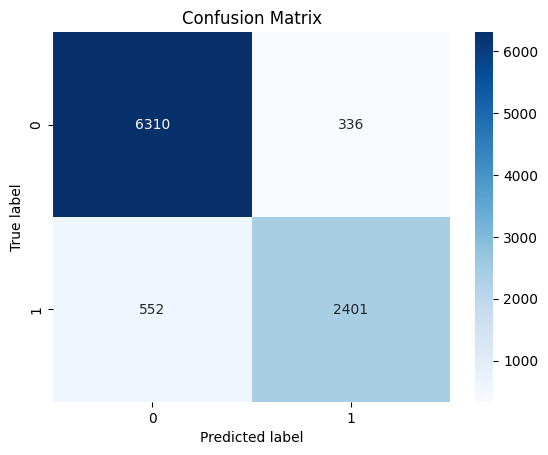

In [ ]:
# prompt: show the confusion  matrix graph for the model

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions
y_pred = logreg.predict(count_vec.transform(X_test))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         Bad       0.92      0.95      0.93      6646
        Good       0.88      0.81      0.84      2953

    accuracy                           0.91      9599
   macro avg       0.90      0.88      0.89      9599
weighted avg       0.91      0.91      0.91      9599



In [ ]:
# prompt: give  me the code to check how many of the total reviews are bad and how many are marked as good

good_reviews = final_data[final_data['sentiment'] == 'Good'].shape[0]
bad_reviews = final_data[final_data['sentiment'] == 'Bad'].shape[0]

print(f"Number of good reviews: {good_reviews}")
print(f"Number of bad reviews: {bad_reviews}")


Number of good reviews: 14938
Number of bad reviews: 33056
